#**Credit Risk Loan Prediction**

ID/X Partners Data Scientist VIX Program

Jackie Limanto




### **Install imbalanced-learn Package**

In [1]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Menyambungkan ke Akun Google**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Package yang Digunakan**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

set jumlah batasan kolom dan baris ke tidak ada batasan, sehingga data akan terlihat semua.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### **Import Data**

In [5]:
raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Final IDX VIX Rakamin/loan_data_2007_2014.csv', index_col='Unnamed: 0')

<ipython-input-5-bf4044626b06>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Final IDX VIX Rakamin/loan_data_2007_2014.csv', index_col='Unnamed: 0')


# **Cleaning Data**

## Jumlah Baris dan Kolom Pada data

In [6]:
raw_data.shape

(466285, 74)

## Missing Value dan Data yang Kosong

In [7]:
raw_data.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [8]:
# Identifikasi semua kolom yang ada missing values
missing_value = raw_data.columns[raw_data.isna().all()]
# Drop semua kolom missing values
raw_data.drop(missing_value, axis=1, inplace=True)

In [9]:
# Identifikasi kolom dengan missing values
missing_data = raw_data.loc[:, raw_data.isnull().any()]

In [10]:
missing_data.isnull().sum()

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

In [11]:
# Pilih kolom dengan missing value dan tipe data objek
missing_value = raw_data.select_dtypes(include=['object']).loc[:, raw_data.isnull().any()]

In [12]:
missing_value.isnull().sum()

emp_title              27588
emp_length             21008
desc                  340302
title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

In [13]:
cat = ['emp_title', 'emp_length', 'desc', 'title', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
raw_data[cat].describe()

,emp_title,emp_length,desc,title,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,438697,445277,125983,466265,466256,465909,239071,466243
unique,205475,11,124436,63099,664,98,100,103
top,Teacher,10+ years,,Debt consolidation,Oct-00,Jan-16,Feb-16,Jan-16
freq,5399,150049,234,164075,3674,179620,208393,327699


## Kolom Kategorikal

### Kolom emp_title

The Job Title from Borrower

In [14]:
raw_data['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'MecÃ¡nica',
       'Chief of Interpretation (Park Ranger)', 'Server Engineer Lead'],
      dtype=object)

In [15]:
dataframe = raw_data.drop(columns=['emp_title'], axis=1)

In [16]:
# Pilih kolom tipe objek dengan missing value
missing_value = dataframe.select_dtypes(include='object').loc[:, dataframe.isna().any()]

In [17]:
# Hitung missing value di setiap kolom yang dipilih
missing_value.isna().sum()

emp_length             21008
desc                  340302
title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom emp_length

Employment length in years.

In [18]:
raw_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
# Isi nilai yang hilang di kolom 'emp_length' dengan '10+ tahun'
dataframe['emp_length'] = dataframe['emp_length'].fillna('10+ years')

In [20]:
mapping_emp_length = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '3 years': 3,
    '8 years': 8,
    '9 years': 9,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '2 years': 2,
    '7 years': 7
}

dataframe['emp_length'] = dataframe['emp_length'].map(mapping_emp_length)

In [21]:
dataframe['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [22]:
# Pilih kolom tipe objek dengan missing value
missing_value = dataframe.select_dtypes(include='object').loc[:, dataframe.isna().any()]

In [23]:
missing_value.isna().sum()

desc                  340302
title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom desc

In [24]:
raw_data['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [25]:
dataframe.drop(columns='desc', inplace=True)

In [26]:
# Pilih kolom tipe objek dengan missing value
missing_value = dataframe.select_dtypes(include='object').loc[:, dataframe.isna().any()]

In [27]:
missing_value.isna().sum()

title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom title

In [28]:
dataframe['title'].unique()

array(['Computer', 'bike', 'real estate business', ..., 'LoanGetter',
       'Consolidation 01', 'Paying off the car and some bills'],
      dtype=object)

In [29]:
dataframe.drop(columns=['title'], inplace=True)

In [30]:
# Pilih kolom tipe objek dengan missing value
missing_value = dataframe.select_dtypes(include='object').loc[:, dataframe.isna().any()]

In [31]:
missing_value.isna().sum()

earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### kolom earliest_cr_line

In [32]:
dataframe['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

Pada kolom earliest_cr_line, perlu adanya modifikasi dari format bulan-tahun menjadi berapa lama waktu telah berlalu sejak saat itu.

In [33]:
dataframe['earliest_cr_line_date'] = pd.to_datetime(dataframe['earliest_cr_line'], format='%b-%y')

In [34]:
dataframe['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [35]:
dataframe['earliest_cr_line_date'].describe()

<ipython-input-35-ccdbe3649697>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe['earliest_cr_line_date'].describe()


count                  466256
unique                    664
top       2000-10-01 00:00:00
freq                     3674
first     1969-01-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line_date, dtype: object

In [36]:
dataframe['months_since_earliest_cr_line'] = ((pd.to_datetime('2016-07-01') - dataframe['earliest_cr_line_date']) / np.timedelta64(1, 'M')).round()

In [37]:
dataframe['months_since_earliest_cr_line'].head()

0    378.0
1    207.0
2    176.0
3    245.0
4    246.0
Name: months_since_earliest_cr_line, dtype: float64

In [38]:
dataframe['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        222.482430
std          93.974829
min        -629.000000
25%         166.000000
50%         208.000000
75%         268.000000
max         570.000000
Name: months_since_earliest_cr_line, dtype: float64

In [39]:
len(dataframe[dataframe['earliest_cr_line_date'].dt.year > 2014])

1169

In [40]:
# Mencari Tahu Tahun Terbaru
earliest_year = dataframe[dataframe['earliest_cr_line_date'].dt.year > 2014]

In [41]:
earliest_year['earliest_cr_line_date'].min()

Timestamp('2044-01-01 00:00:00')

In [42]:
# Drop baris di mana tahun kolom 'earliest_cr_line_date' lebih besar dari 2014.
dataframe = dataframe[dataframe['earliest_cr_line_date'].dt.year <= 2014]

In [43]:
dataframe['earliest_cr_line_date'].describe()

<ipython-input-43-ccdbe3649697>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe['earliest_cr_line_date'].describe()


count                  465087
unique                    515
top       2000-10-01 00:00:00
freq                     3674
first     1969-01-01 00:00:00
last      2011-11-01 00:00:00
Name: earliest_cr_line_date, dtype: object

In [44]:
dataframe.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

<ipython-input-44-0080f55b90cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)


In [45]:
dataframe['months_since_earliest_cr_line'].fillna(0, inplace=True)

<ipython-input-45-e5e8abe73c76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['months_since_earliest_cr_line'].fillna(0, inplace=True)


### Kolom last_pymnt_d

In [46]:
dataframe['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

Pada kolom last_pymnt_d, perlu adanya modifikasi dari format bulan-tahun menjadi berapa lama waktu telah berlalu sejak saat itu.

In [47]:
dataframe['last_pymnt_d_date'] = pd.to_datetime(dataframe['last_pymnt_d'], format='%b-%y')

In [48]:
dataframe['last_pymnt_d_date'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d_date, dtype: datetime64[ns]

In [49]:
dataframe['last_pymnt_d_date'].describe()

<ipython-input-49-c724c0157700>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe['last_pymnt_d_date'].describe()


count                  464712
unique                     98
top       2016-01-01 00:00:00
freq                   179104
first     2007-12-01 00:00:00
last      2016-01-01 00:00:00
Name: last_pymnt_d_date, dtype: object

In [50]:
dataframe['months_since_last_pymnt_d'] = ((pd.to_datetime('2016-07-01') - dataframe['last_pymnt_d_date']) / np.timedelta64(1, 'M')).round()

In [51]:
dataframe['months_since_last_pymnt_d'].head()

0    18.0
1    39.0
2    25.0
3    18.0
4     6.0
Name: months_since_last_pymnt_d, dtype: float64

In [52]:
dataframe['months_since_last_pymnt_d'].describe()

count    464712.000000
mean         14.294055
std          12.802383
min           6.000000
25%           6.000000
50%           7.000000
75%          18.000000
max         103.000000
Name: months_since_last_pymnt_d, dtype: float64

In [53]:
dataframe.drop(columns=['last_pymnt_d', 'last_pymnt_d_date'], inplace=True)

In [54]:
dataframe['months_since_last_pymnt_d'].fillna(0, inplace=True)

### Kolom next_pymnt_d

In [55]:
dataframe['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

Pada kolom next_pymnt_d, perlu adanya modifikasi dari format bulan-tahun menjadi berapa lama waktu telah berlalu sejak saat itu.

In [56]:
dataframe['next_pymnt_d_date'] = pd.to_datetime(dataframe['next_pymnt_d'], format='%b-%y')

In [57]:
dataframe['next_pymnt_d'].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    Feb-16
Name: next_pymnt_d, dtype: object

In [58]:
dataframe['next_pymnt_d'].describe()

count     238361
unique       100
top       Feb-16
freq      207784
Name: next_pymnt_d, dtype: object

In [59]:
dataframe['months_since_next_pymnt_d'] = ((pd.to_datetime('2016-07-01') - dataframe['next_pymnt_d_date']) / np.timedelta64(1, 'M')).round()

In [60]:
dataframe['months_since_next_pymnt_d'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    5.0
Name: months_since_next_pymnt_d, dtype: float64

In [61]:
dataframe['months_since_next_pymnt_d'].describe()

count    238361.000000
mean          5.729624
std           6.028620
min           4.000000
25%           5.000000
50%           5.000000
75%           5.000000
max         103.000000
Name: months_since_next_pymnt_d, dtype: float64

In [62]:
dataframe.drop(columns=['next_pymnt_d', 'next_pymnt_d_date'], inplace=True)

In [63]:
dataframe['months_since_next_pymnt_d'].fillna(0, inplace=True)

### Kolom last_credit_pull_d

In [64]:
dataframe['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

Pada kolom last_credit_pull_d, perlu adanya modifikasi dari format bulan-tahun menjadi berapa lama waktu telah berlalu sejak saat itu.

In [65]:
dataframe['last_credit_pull_d_date'] = pd.to_datetime(dataframe['last_credit_pull_d'], format='%b-%y')

In [66]:
dataframe['last_credit_pull_d_date'].head()

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d_date, dtype: datetime64[ns]

In [67]:
dataframe['last_credit_pull_d_date'].describe()

<ipython-input-67-bd63bdd60ff4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataframe['last_credit_pull_d_date'].describe()


count                  465047
unique                    103
top       2016-01-01 00:00:00
freq                   326846
first     2007-05-01 00:00:00
last      2016-01-01 00:00:00
Name: last_credit_pull_d_date, dtype: object

In [68]:
dataframe['months_since_last_credit_pull_d'] = ((pd.to_datetime('2016-07-01') - dataframe['last_credit_pull_d_date']) / np.timedelta64(1, 'M')).round()

In [69]:
dataframe['months_since_last_credit_pull_d'].head()

0     6.0
1    34.0
2     6.0
3    18.0
4     6.0
Name: months_since_last_credit_pull_d, dtype: float64

In [70]:
dataframe['months_since_last_credit_pull_d'].describe()

count    465047.000000
mean         10.042112
std           9.619433
min           6.000000
25%           6.000000
50%           6.000000
75%           8.000000
max         110.000000
Name: months_since_last_credit_pull_d, dtype: float64

In [71]:
dataframe.drop(columns=['last_credit_pull_d_date', 'last_credit_pull_d'], inplace=True)

In [72]:
dataframe['months_since_last_credit_pull_d'].fillna(0, inplace=True)

## Kolom Numerikal

In [73]:
# pilih kolom numeric yang ada missing value
missing_value = raw_data.select_dtypes(exclude='object').loc[:, raw_data.isna().any()]

In [74]:
missing_value.isna().sum()

annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

In [75]:
missing_value.head()

,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000.0,0.0,1.0,NaN,NaN,3.0,0.0,83.7,9.0,0.0,NaN,0.0,NaN,NaN,NaN
1,30000.0,0.0,5.0,NaN,NaN,3.0,0.0,9.4,4.0,0.0,NaN,0.0,NaN,NaN,NaN
2,12252.0,0.0,2.0,NaN,NaN,2.0,0.0,98.5,10.0,0.0,NaN,0.0,NaN,NaN,NaN
3,49200.0,0.0,1.0,35.0,NaN,10.0,0.0,21.0,37.0,0.0,NaN,0.0,NaN,NaN,NaN
4,80000.0,0.0,0.0,38.0,NaN,15.0,0.0,53.9,38.0,0.0,NaN,0.0,NaN,NaN,NaN


In [76]:
missing_value.describe()

,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662810e+05,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,465945.000000,466256.000000,466140.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,7.327738e+04,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,56.176947,25.064430,0.009085,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,5.496357e+04,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,23.732628,11.600141,0.108648,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+04,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,39.200000,17.000000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,6.300000e+04,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,57.600000,23.000000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,8.896000e+04,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,74.700000,32.000000,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,7.500000e+06,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,892.300000,156.000000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


### Check Missing Value pada data, jika di atas 50% maka di drop 

In [77]:
check_missing = (dataframe.isnull().mean() * 100)

In [78]:
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.594121
mths_since_last_major_derog    78.793000
mths_since_last_delinq         53.709951
tot_coll_amt                   15.075674
tot_cur_bal                    15.075674
total_rev_hi_lim               15.075674
revol_util                      0.066869
collections_12_mths_ex_med      0.024942
dtype: float64

In [79]:
dataframe.drop(columns=['mths_since_last_record', 'mths_since_last_major_derog','mths_since_last_delinq'], inplace=True)

### Sisa missing value di isi 0

In [80]:
dataframe['tot_coll_amt'].fillna(0, inplace=True)
dataframe['tot_cur_bal'].fillna(0, inplace=True)
dataframe['total_acc'].fillna(0, inplace=True)
dataframe['total_rev_hi_lim'].fillna(0, inplace=True)
dataframe['revol_util'].fillna(0, inplace=True)
dataframe['collections_12_mths_ex_med'].fillna(0, inplace=True)
dataframe['delinq_2yrs'].fillna(0, inplace=True)
dataframe['inq_last_6mths'].fillna(0, inplace=True)
dataframe['open_acc'].fillna(0, inplace=True)
dataframe['pub_rec'].fillna(0, inplace=True)
dataframe['total_acc'].fillna(0, inplace=True)
dataframe['acc_now_delinq'].fillna(0, inplace=True)
dataframe['annual_inc'].fillna(0, inplace=True)

In [81]:
missing_value = dataframe.select_dtypes(exclude=['object']).isna().any()
missing_value = dataframe[missing_value[missing_value].index]

In [82]:
missing_value.isna().sum()

Series([], dtype: float64)

### cek kembali apakah masih ada missing value

In [83]:
sorted(dataframe.isna().sum(), reverse=True)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [84]:
dataframe.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'months_since_earliest_cr_line', 'months_since_last_pymnt_d',
       'months_since_next_pymnt_d', 'months_since_last_credit_pull_d'],
      dtype='object')

### drop kolom dengan unique value dan kolom yang tidak relevan

In [85]:
dataframe.drop(columns=['url', 'id', 'member_id', 'sub_grade'], inplace=True)

### reset index dan buat index baru dengan nama df

In [86]:
df = dataframe.reset_index(drop=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_next_pymnt_d,months_since_last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,378.0,18.0,0.0,6.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,207.0,39.0,0.0,34.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,176.0,25.0,0.0,6.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,245.0,18.0,0.0,18.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,246.0,6.0,5.0,6.0


<ipython-input-87-a99dc9f4a8ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


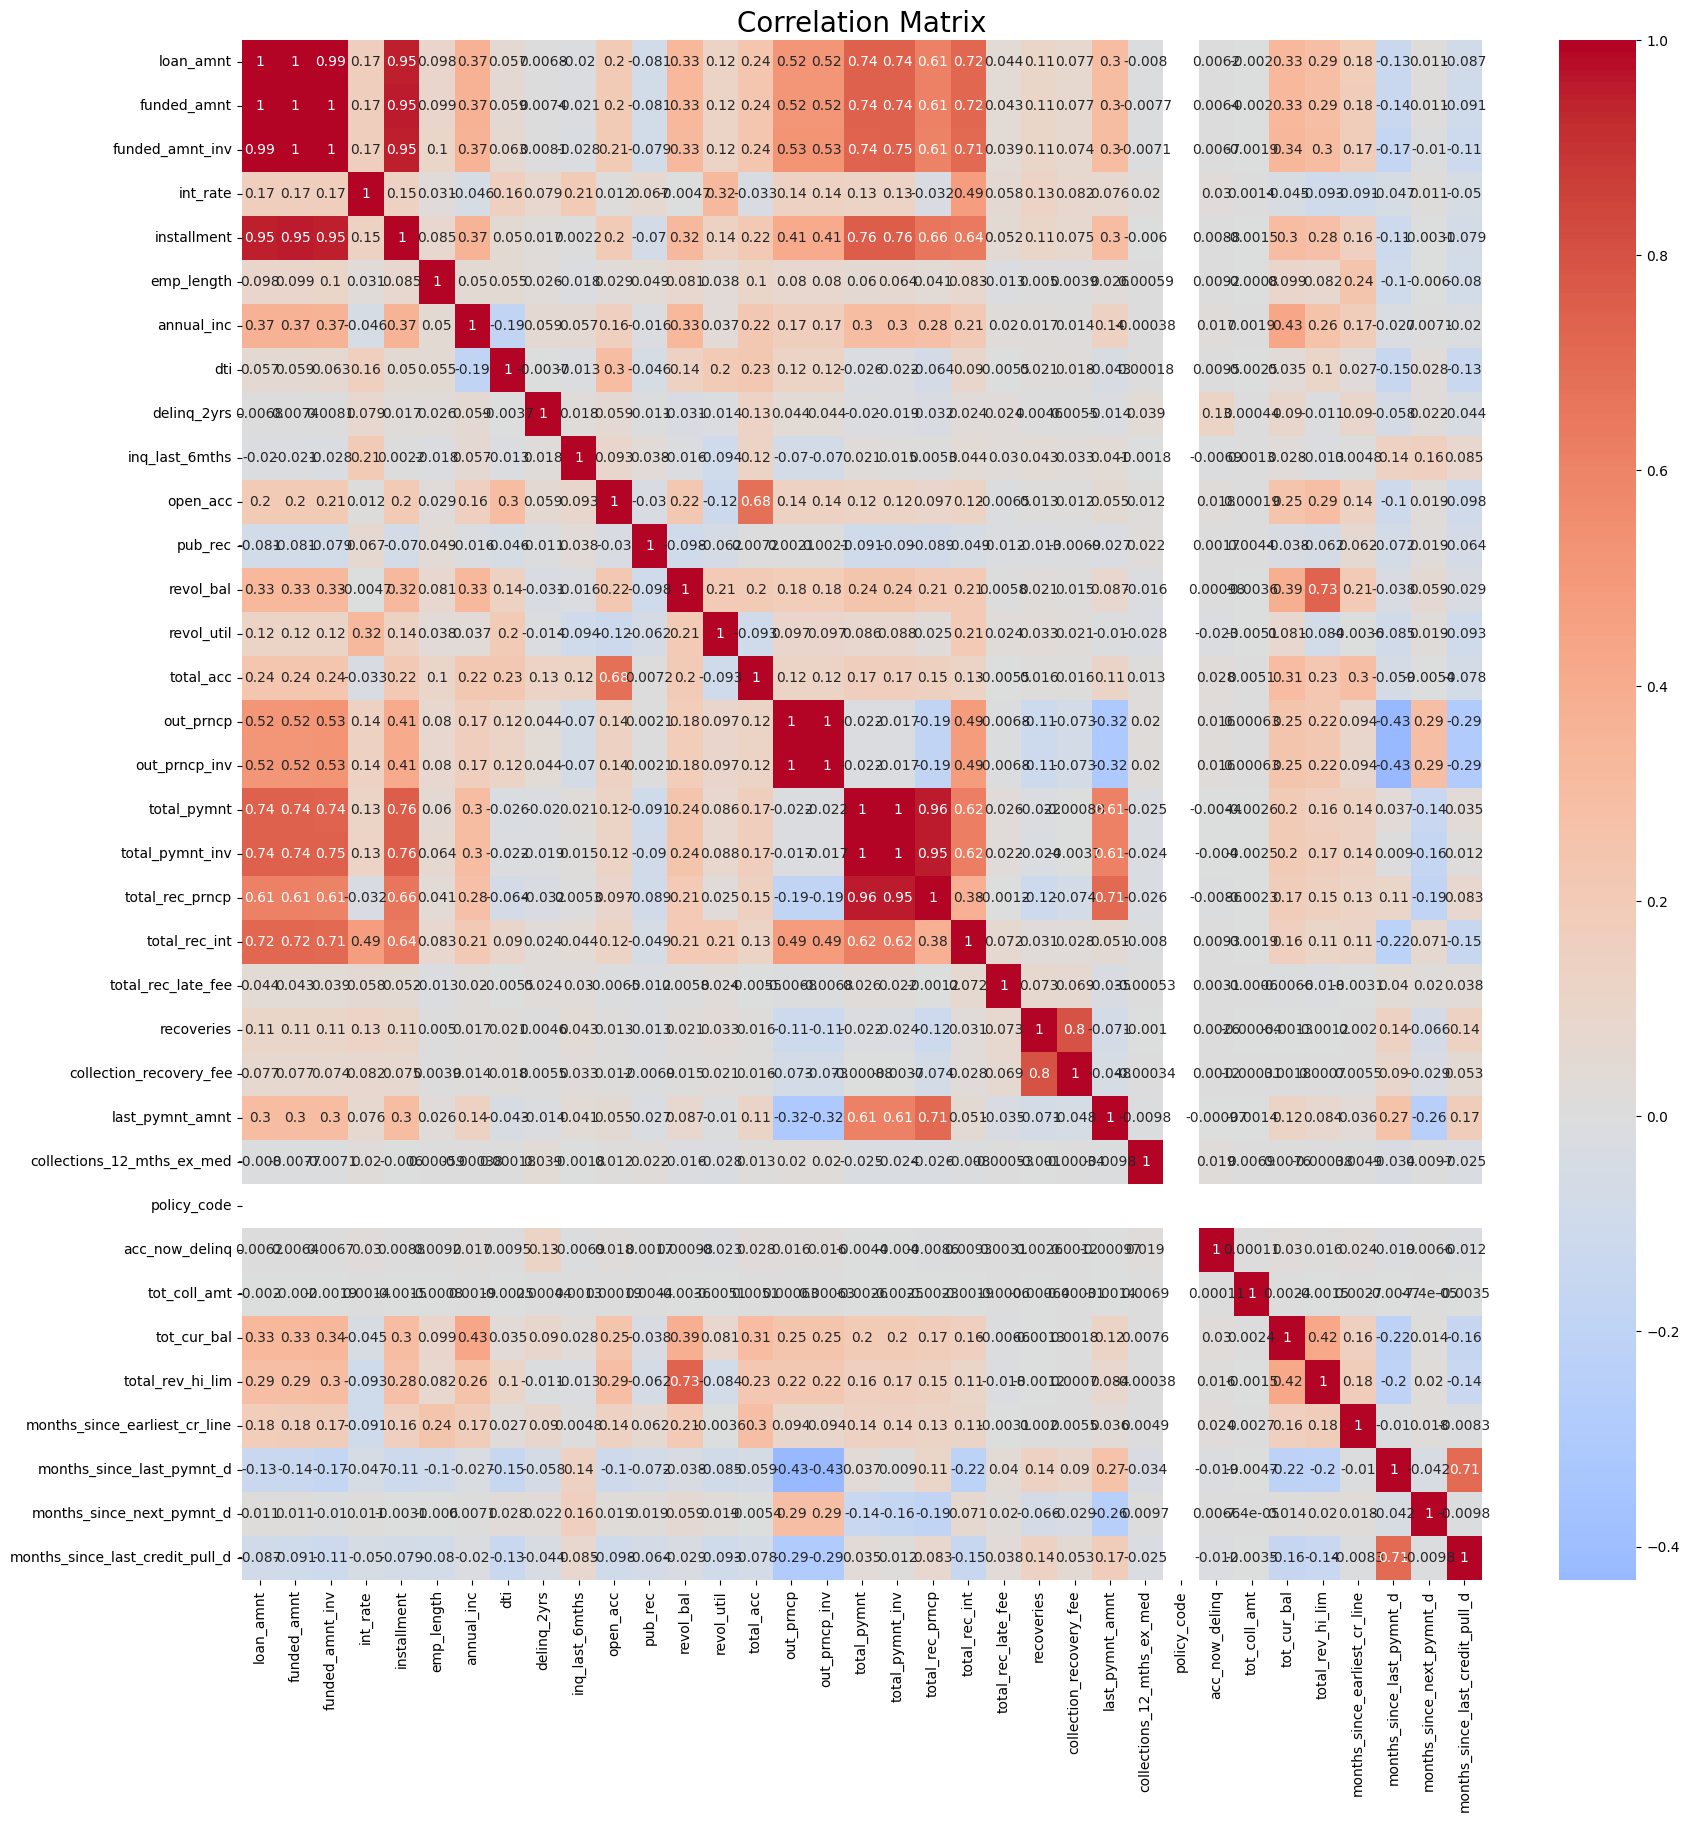

In [87]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [88]:
df.select_dtypes(include='object').nunique()

term                     2
grade                    7
home_ownership           6
verification_status      3
issue_d                 91
loan_status              9
pymnt_plan               2
purpose                 14
zip_code               888
addr_state              50
initial_list_status      2
application_type         1
dtype: int64

In [89]:
df.select_dtypes(exclude='object').nunique()

loan_amnt                            1352
funded_amnt                          1353
funded_amnt_inv                      9831
int_rate                              506
installment                         55558
emp_length                             11
annual_inc                          31785
dti                                  3997
delinq_2yrs                            24
inq_last_6mths                         28
open_acc                               62
pub_rec                                26
revol_bal                           58050
revol_util                           1268
total_acc                             112
out_prncp                          135366
out_prncp_inv                      140864
total_pymnt                        350864
total_pymnt_inv                    346922
total_rec_prncp                    172310
total_rec_int                      269847
total_rec_late_fee                   5791
recoveries                          22722
collection_recovery_fee           

fitur dengan hanya 1 unique value perlu dibuang karena high cardinality akan membuat hasil dari model menjadi tidak baik.

In [90]:
df.drop(columns=['policy_code', 'application_type'], inplace=True)

### kolom loan_status sebagai kolom target

In [91]:
df['loan_status'].value_counts()

Current                                                223577
Fully Paid                                             184379
Charged Off                                             42347
Late (31-120 days)                                       6885
In Grace Period                                          3144
Does not meet the credit policy. Status:Fully Paid       1957
Late (16-30 days)                                        1213
Default                                                   828
Does not meet the credit policy. Status:Charged Off       757
Name: loan_status, dtype: int64

berdasarkan kategori loan diatas, masing-masing individu dapat di tandai sebagai `Bad Loaner` atau `Good Loaner`.



Definisi `Bad Loaner` atau `Good Loaner` itu sendiri adalah preferensi masing-masing bisnis, dalam model ini `Bad Loaner` adalah individu yang mengalami keterlambatan pembayaran lebih dari 2 minggu.

In [92]:
bad_loaner = [
    'Charged Off',
    'Default',
    'Late (16-30 days)',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

In [93]:
df['status_code'] = (df['loan_status'].isin(bad_loaner)).astype(int)

In [94]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_next_pymnt_d,months_since_last_credit_pull_d,status_code
0,5000,5000,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,378.0,18.0,0.0,6.0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,0.0,207.0,39.0,0.0,34.0,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,176.0,25.0,0.0,6.0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,0.0,245.0,18.0,0.0,18.0,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,246.0,6.0,5.0,6.0,0


In [95]:
df['status_code'].value_counts()

0    413057
1     52030
Name: status_code, dtype: int64

In [96]:
df['status_code'].value_counts(normalize=True) * 100

0    88.812846
1    11.187154
Name: status_code, dtype: float64

In [97]:
df.drop(columns=['loan_status'], inplace=True)

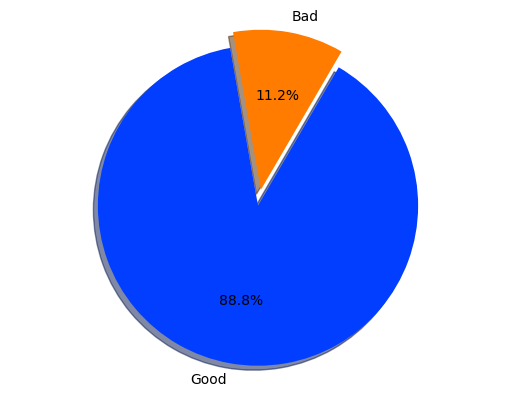

In [98]:
labels = ['Good', 'Bad']
explode = (0, 0.1)
colors = sns.color_palette('bright')[0:2]  # Use only two colors for the two labels

fig, ax = plt.subplots()
ax.pie(df['status_code'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=100, colors=colors)

ax.axis('equal')
fig.set_facecolor('white')  # Set the figure's background color to white

plt.show()

# Data pre-processing

###Data kategorik dan numerik

In [99]:
categoric = df.select_dtypes(include=['object'])
numeric = df.select_dtypes(exclude=['object'])

In [100]:
categoric.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state',
       'initial_list_status'],
      dtype='object')

In [101]:
numeric.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'months_since_earliest_cr_line', 'months_since_last_pymnt_d',
       'months_since_next_pymnt_d', 'months_since_last_credit_pull_d',
       'status_code'],
      dtype='object')

In [102]:
categoric.head()

,term,grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,RENT,Verified,Dec-11,n,credit_card,860xx,AZ,f
1,60 months,C,RENT,Source Verified,Dec-11,n,car,309xx,GA,f
2,36 months,C,RENT,Not Verified,Dec-11,n,small_business,606xx,IL,f
3,36 months,C,RENT,Source Verified,Dec-11,n,other,917xx,CA,f
4,60 months,B,RENT,Source Verified,Dec-11,n,other,972xx,OR,f


In [103]:
categoric.describe()

,term,grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
count,465087,465087,465087,465087,465087,465087,465087,465087,465087,465087
unique,2,7,6,3,91,2,14,888,50,2
top,36 months,B,MORTGAGE,Verified,Oct-14,n,debt_consolidation,945xx,CA,f
freq,337058,136540,235204,167439,38678,465078,273587,5297,71240,302241


Dapat dilihat bahwa kolom term dan issue_d masing memiliki masalah, perlu diubah menjadi angka saja, sehingga lebih mudah ketika akan diproses


## Kolom Kategorik

### Kolom term

In [104]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [105]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(int)

In [106]:
df['term'].unique()

array([36, 60])

### Kolom issue_d

In [107]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [108]:
df['issue_d_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d_date, dtype: datetime64[ns]

In [109]:
df['issue_d_date'].describe()

<ipython-input-109-c918a85f667e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['issue_d_date'].describe()


count                  465087
unique                     91
top       2014-10-01 00:00:00
freq                    38678
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issue_d_date, dtype: object

In [110]:
df['months_since_issue_d'] = ((pd.to_datetime('2016-07-01') - df['issue_d_date']) / np.timedelta64(1, 'M')).round()

In [111]:
df['months_since_issue_d'].head()

0    55.0
1    55.0
2    55.0
3    55.0
4    55.0
Name: months_since_issue_d, dtype: float64

In [112]:
df['months_since_issue_d'].describe()

count    465087.000000
mean         34.254438
std          14.330835
min          19.000000
25%          24.000000
50%          30.000000
75%          40.000000
max         109.000000
Name: months_since_issue_d, dtype: float64

In [113]:
df.drop(columns=['issue_d', 'issue_d_date'], inplace=True)

##Outlier

In [114]:
num = df[df.dtypes[df.dtypes != 'object'].index]

In [115]:
num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_next_pymnt_d,months_since_last_credit_pull_d,status_code,months_since_issue_d
0,5000,5000,4975.0,36,10.65,162.87,10,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,378.0,18.0,0.0,6.0,0,55.0
1,2500,2500,2500.0,60,15.27,59.83,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,0.0,207.0,39.0,0.0,34.0,1,55.0
2,2400,2400,2400.0,36,15.96,84.33,10,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,176.0,25.0,0.0,6.0,0,55.0
3,10000,10000,10000.0,36,13.49,339.31,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,0.0,245.0,18.0,0.0,18.0,0,55.0
4,3000,3000,3000.0,60,12.69,67.79,1,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,246.0,6.0,5.0,6.0,0,55.0


In [116]:
num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'months_since_earliest_cr_line', 'months_since_last_pymnt_d',
       'months_since_next_pymnt_d', 'months_since_last_credit_pull_d',
       'status_code', 'months_since_issue_d'],
      dtype='object')

In [117]:
num = ['loan_amnt', 'funded_amnt', 'int_rate',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d',
       'months_since_next_pymnt_d', 'months_since_last_credit_pull_d',
       'months_since_issue_d']

In [118]:
# removing outlier
from scipy import stats
z_scores = np.abs(stats.zscore(df[num]))
df = df[(z_scores < 3).all(axis=1)]
df.shape

(369872, 45)

# Data Modelling

In [119]:
cat = df.select_dtypes(include='object')

In [120]:
cat.columns

Index(['grade', 'home_ownership', 'verification_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'initial_list_status'],
      dtype='object')

In [121]:
cat = ['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'emp_length', 'term']

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), num),
    ('categoric', OneHotEncoder(handle_unknown='ignore'), cat ),
])

In [123]:
X = df.drop(columns=["status_code"])
y = df["status_code"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((295897, 44), (73975, 44), (295897,), (73975,))

In [124]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1, random_state=42))
])

In [125]:
parameter = {
    'algo__solver': ['lbfgs'],
    'algo__fit_intercept': [True, False],
}

In [126]:
from sklearn.model_selection import cross_val_score, GridSearchCV
model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'algo__fit_intercept': True, 'algo__solver': 'lbfgs'}
0.9789791718064056 0.978857508727976 0.9781547820209531


In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', include_values=True, values_format='d')
    plt.title(title)
    plt.show()

Classification Report - Train

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    269201
           1       0.99      0.77      0.87     26696

    accuracy                           0.98    295897
   macro avg       0.99      0.89      0.93    295897
weighted avg       0.98      0.98      0.98    295897



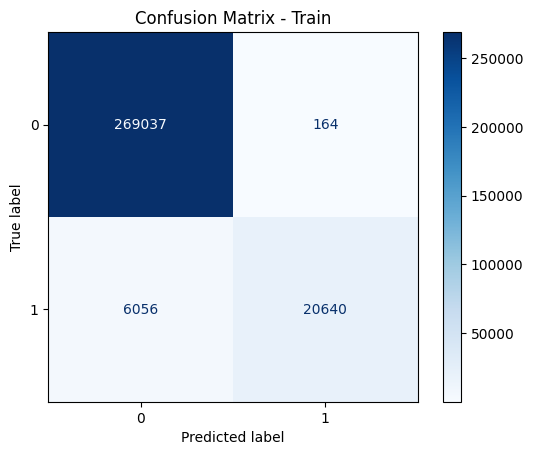

Classification Report - Test

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     67301
           1       0.99      0.77      0.86      6674

    accuracy                           0.98     73975
   macro avg       0.98      0.88      0.93     73975
weighted avg       0.98      0.98      0.98     73975



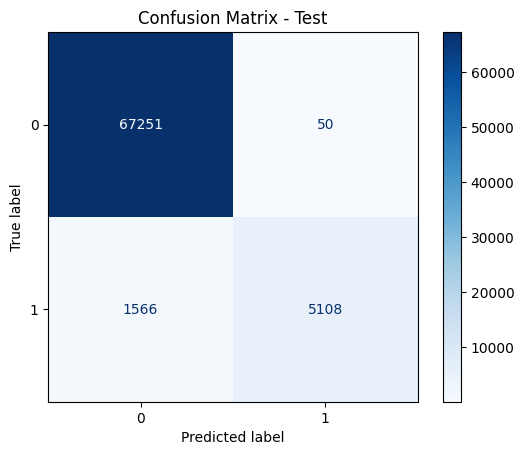

In [128]:
# Training set evaluation
y_pred_train = model.predict(X_train)
labels = model.classes_

print("Classification Report - Train\n")
print(classification_report(y_train, y_pred_train))

plot_confusion_matrix(y_train, y_pred_train, labels, "Confusion Matrix - Train")

# Test set evaluation
y_pred_test = model.predict(X_test)

print("Classification Report - Test\n")
print(classification_report(y_test, y_pred_test))

plot_confusion_matrix(y_test, y_pred_test, labels, "Confusion Matrix - Test")


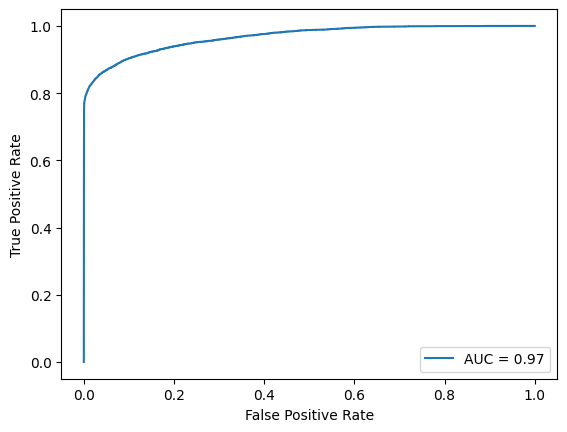

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

y_pred = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred)